## Internal Project Grouop 9 - Retail Sales

Hello World! 

We will be analysing the past sales data to reveal useful data insights that could benefit our clients.

#### Importing Libraries
Do pip install commands before the import commands if you have yet to install the libraries

In [1]:
# uncomment the following pip install commands where needed
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

import pandas as pd         # data manipulation & analysis
import numpy as np          # numerical & mathematical operations
import matplotlib.pyplot as plt         # for creating visualisations
import seaborn as  sns          # for more advanced visualisations 

#### Reading data into dataframe

In [2]:
df = pd.read_csv('datasets/Retail_Store.csv' , encoding='latin-1') #latin-1 encoding to deal with decoding error

#### Take a look at the data O.O
Understanding the data before we proceed with further analysis. <br/>
Viewing df in Data Wrangler will allow us to see the full data.

In [3]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
# Finding number of columns and rows
print("The Original Dataset contains", df.shape[1],"Columns and", df.shape[0],"Rows.")

The Original Dataset contains 53 Columns and 180519 Rows.


In [6]:
# Checking for missing values
def col_missing_values(df):
    for i in df.columns:
        if df[i].isna().sum()>0:
            print("Column",i,"is missing",str(df[i].isna().sum()),"values.")

col_missing_values(df)

Column Customer Lname is missing 8 values.
Column Customer Zipcode is missing 3 values.
Column Order Zipcode is missing 155679 values.
Column Product Description is missing 180519 values.


In [7]:
#Checking for duplicated rows
duplicate_rows_df = df[df.duplicated()]

print("Number of duplicate rows: ", duplicate_rows_df.shape[0])

Number of duplicate rows:  0


In [8]:
# Check for columns with identical values
duplicated_columns = df.T.duplicated()

# Display names of duplicated columns
duplicate_columns = df.columns[duplicated_columns].tolist()
print("Duplicate columns:", duplicate_columns)

Duplicate columns: ['Customer Password', 'Order Customer Id', 'Order Item Total', 'Order Profit Per Order', 'Product Card Id', 'Product Category Id', 'Product Price']


From the codes above, we have decided to drop:
* Columns with missing data <br/>
        -- Reason being it holds little value to our investigation
* Duplicate Columns 
* Other columns we deem carry insignificant information

In [9]:
df = df.drop(columns=['Customer Lname','Customer Zipcode','Order Zipcode','Product Description',
                      'Customer Password','Order Customer Id','Order Item Total','Order Profit Per Order',
                      'Product Card Id','Product Category Id','Product Price','Customer Fname',
                      'Product Description','Customer Email','Product Image','Product Status',
                      'Order Id','Order Item Id','Order Item Cardprod Id'])

In [10]:
# Dropped 18 Columns
df.shape

(180519, 35)

#### Converting and Filtering of data

Coverting DateOrders column to DateTime format using Pandas to perform trend analysis

In [11]:
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

print(df['order_date'])

0        2018-01-31 22:56:00
1        2018-01-13 12:27:00
2        2018-01-13 12:06:00
3        2018-01-13 11:45:00
4        2018-01-13 11:24:00
                 ...        
180514   2016-01-16 03:40:00
180515   2016-01-16 01:34:00
180516   2016-01-15 21:00:00
180517   2016-01-15 20:18:00
180518   2016-01-15 18:54:00
Name: order_date, Length: 180519, dtype: datetime64[ns]


Note: Year 2018 only has data up till month of January <br/>
Due to insufficient data for comprehensive analysis, we will be dropping data for year 2018

In [12]:
# Drop rows where 'year' is 2018
df_filter_year = df[df['year'] != 2018]

# Preview the filtered dataset
df_filter_year

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Sales,Order Region,Order State,Order Status,Product Name,shipping date (DateOrders),Shipping Mode,order_date,year,month
48,PAYMENT,5,2,-30.750000,115.180000,Late delivery,1,17,Cleats,Bayamon,...,119.980003,South Asia,Uttar Pradesh,PENDING_PAYMENT,Perfect Fitness Perfect Rip Deck,2/29/2016 13:57,Second Class,2016-02-24 13:57:00,2016,2
49,PAYMENT,2,2,-122.730003,79.180000,Shipping on time,0,29,Shop By Sport,Caguas,...,79.980003,West Asia,Bursa,PENDING_PAYMENT,Under Armour Girls' Toddler Spine Surge Runni,10/27/2016 14:39,Second Class,2016-10-25 14:39:00,2016,10
50,PAYMENT,6,2,33.599998,96.000000,Late delivery,1,24,Women's Apparel,Caguas,...,100.000000,Oceania,Australia del Sur,PENDING_PAYMENT,Nike Men's Dri-FIT Victory Golf Polo,4/5/2016 4:37,Second Class,2016-03-30 04:37:00,2016,3
51,PAYMENT,2,2,24.690001,75.980003,Shipping on time,0,29,Shop By Sport,Caguas,...,79.980003,West Asia,Estambul,PENDING_PAYMENT,Under Armour Girls' Toddler Spine Surge Runni,11/1/2016 1:31,Second Class,2016-10-30 01:31:00,2016,10
52,PAYMENT,3,2,9.100000,91.000000,Late delivery,1,24,Women's Apparel,Caguas,...,100.000000,Eastern Asia,Ulán Bator,PENDING_PAYMENT,Nike Men's Dri-FIT Victory Golf Polo,12/1/2016 1:18,Second Class,2016-11-28 01:18:00,2016,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,399.980011,Eastern Asia,Shanghái,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 3:40,Standard Class,2016-01-16 03:40:00,2016,1
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,399.980011,Eastern Asia,Osaka,COMPLETE,Field & Stream Sportsman 16 Gun Fire Safe,1/19/2016 1:34,Second Class,2016-01-16 01:34:00,2016,1
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,399.980011,Oceania,Australia del Sur,PENDING,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 21:00,Standard Class,2016-01-15 21:00:00,2016,1
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,399.980011,Oceania,Australia del Sur,PENDING_PAYMENT,Field & Stream Sportsman 16 Gun Fire Safe,1/18/2016 20:18,Standard Class,2016-01-15 20:18:00,2016,1


Looking at unique data for columns of interest

In [13]:
print("Order Status :", df['Order Status'].unique())
print("Market:", df['Market'].unique())

print("Department Name:", df['Department Name'].unique())
print("Product Category:", df['Category Name'].unique())

print("Delivery Status :", df['Delivery Status'].unique())
print("Shipping Mode :", df['Shipping Mode'].unique())

Order Status : ['COMPLETE' 'PENDING' 'CLOSED' 'PENDING_PAYMENT' 'CANCELED' 'PROCESSING'
 'SUSPECTED_FRAUD' 'ON_HOLD' 'PAYMENT_REVIEW']
Market: ['Pacific Asia' 'USCA' 'Africa' 'Europe' 'LATAM']
Department Name: ['Fitness' 'Apparel' 'Golf' 'Footwear' 'Outdoors' 'Fan Shop' 'Technology'
 'Book Shop' 'Discs Shop' 'Pet Shop' 'Health and Beauty ']
Product Category: ['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' Golf Clubs"
 'Hunting & Shooting' 'Baseball & Softball' "Men's Footwear"
 'Camping & Hiking' 'Consumer Electronics' 'Cameras ' 'Computers'
 'Basketball' 'Soccer' "Girls' Apparel" 'Accessories' "Women's Clothing"
 'Crafts' "Men's Clothing" 'Tennis & Racquet' 'Fitness Accessories'
 'As Seen on  TV!' 'Golf Balls' 'Strength Training' "Children's Clothing"
 'Lacrosse' 'Baby ' 'Fishing' 'Books ' 'DVDs' 'CDs ' 'Garden' 'Hockey'
 'Pet Supplies' 'Health and Beauty' 'Music' 'Video Games' 'Golf Gloves'
 'Golf Bags & 

Only interested in 'CLOSED' and 'COMPLETED' orders <br/>
As other Order Status includes uncertainty in analysing actual revenue earned.
* assumption made: CLOSED means payment is made

In [14]:
# Further filter to include only 'CLOSED' and 'COMPLETED' in 'Order Status'
df_filter_order = df_filter_year[df_filter_year['Order Status'].isin(['CLOSED', 'COMPLETED'])]

In [15]:
# Renaming dataframe to make life easier

df1 = df_filter_order

df1 

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Sales,Order Region,Order State,Order Status,Product Name,shipping date (DateOrders),Shipping Mode,order_date,year,month
1174,CASH,2,1,78.660004,262.200012,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,Southeast Asia,Yakarta,CLOSED,Smart watch,12/6/2017 14:37,First Class,2017-12-04 14:37:00,2017,12
1177,CASH,3,4,109.669998,324.470001,Advance shipping,0,73,Sporting Goods,Tampa,...,327.750000,Southeast Asia,Yakarta,CLOSED,Smart watch,12/7/2017 13:34,Standard Class,2017-12-04 13:34:00,2017,12
1188,CASH,2,2,136.509995,278.589996,Shipping on time,0,73,Sporting Goods,Irvington,...,327.750000,Southeast Asia,Rangún,CLOSED,Smart watch,12/6/2017 9:43,Second Class,2017-12-04 09:43:00,2017,12
1191,CASH,2,1,23.650000,268.760010,Late delivery,1,73,Sporting Goods,Gardena,...,327.750000,Southeast Asia,Rangún,CLOSED,Smart watch,12/6/2017 8:39,First Class,2017-12-04 08:39:00,2017,12
1198,CASH,2,4,31.459999,314.640015,Advance shipping,0,73,Sporting Goods,Ontario,...,327.750000,Southeast Asia,Capital Nacional,CLOSED,Smart watch,12/6/2017 6:12,Standard Class,2017-12-04 06:12:00,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180467,CASH,2,1,27.900000,371.980011,Late delivery,1,45,Fishing,Panorama City,...,399.980011,South Asia,Maharashtra,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 19:05,First Class,2016-01-18 19:05:00,2016,1
180496,CASH,2,4,145.190002,399.980011,Advance shipping,0,45,Fishing,Costa Mesa,...,399.980011,Eastern Asia,Shanghái,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,1/18/2016 22:14,Standard Class,2016-01-16 22:14:00,2016,1
180498,CASH,3,4,-337.100006,391.980011,Advance shipping,0,45,Fishing,Lindenhurst,...,399.980011,Southeast Asia,Sumatra Meridional,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,1/19/2016 19:05,Standard Class,2016-01-16 19:05:00,2016,1
180504,CASH,3,4,32.029999,363.980011,Advance shipping,0,45,Fishing,Caguas,...,399.980011,Oceania,Territorio de la Capital Australiana,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,1/19/2016 13:49,Standard Class,2016-01-16 13:49:00,2016,1


In [16]:
# Calculating revenue manually: Revenue = Price * Quantity
df1['Revenue'] = df1['Order Item Product Price'] * df1['Order Item Quantity']
annual_revenue = df1.groupby('year')['Revenue'].sum()
print(annual_revenue)

year
2015    1.402915e+06
2016    1.314538e+06
2017    1.267870e+06
Name: Revenue, dtype: float64


C:\Users\lijaa\AppData\Local\Temp\ipykernel_26376\4149683181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Revenue'] = df1['Order Item Product Price'] * df1['Order Item Quantity']


#### Visualisations

Heatmap to analyse the correlations between variables

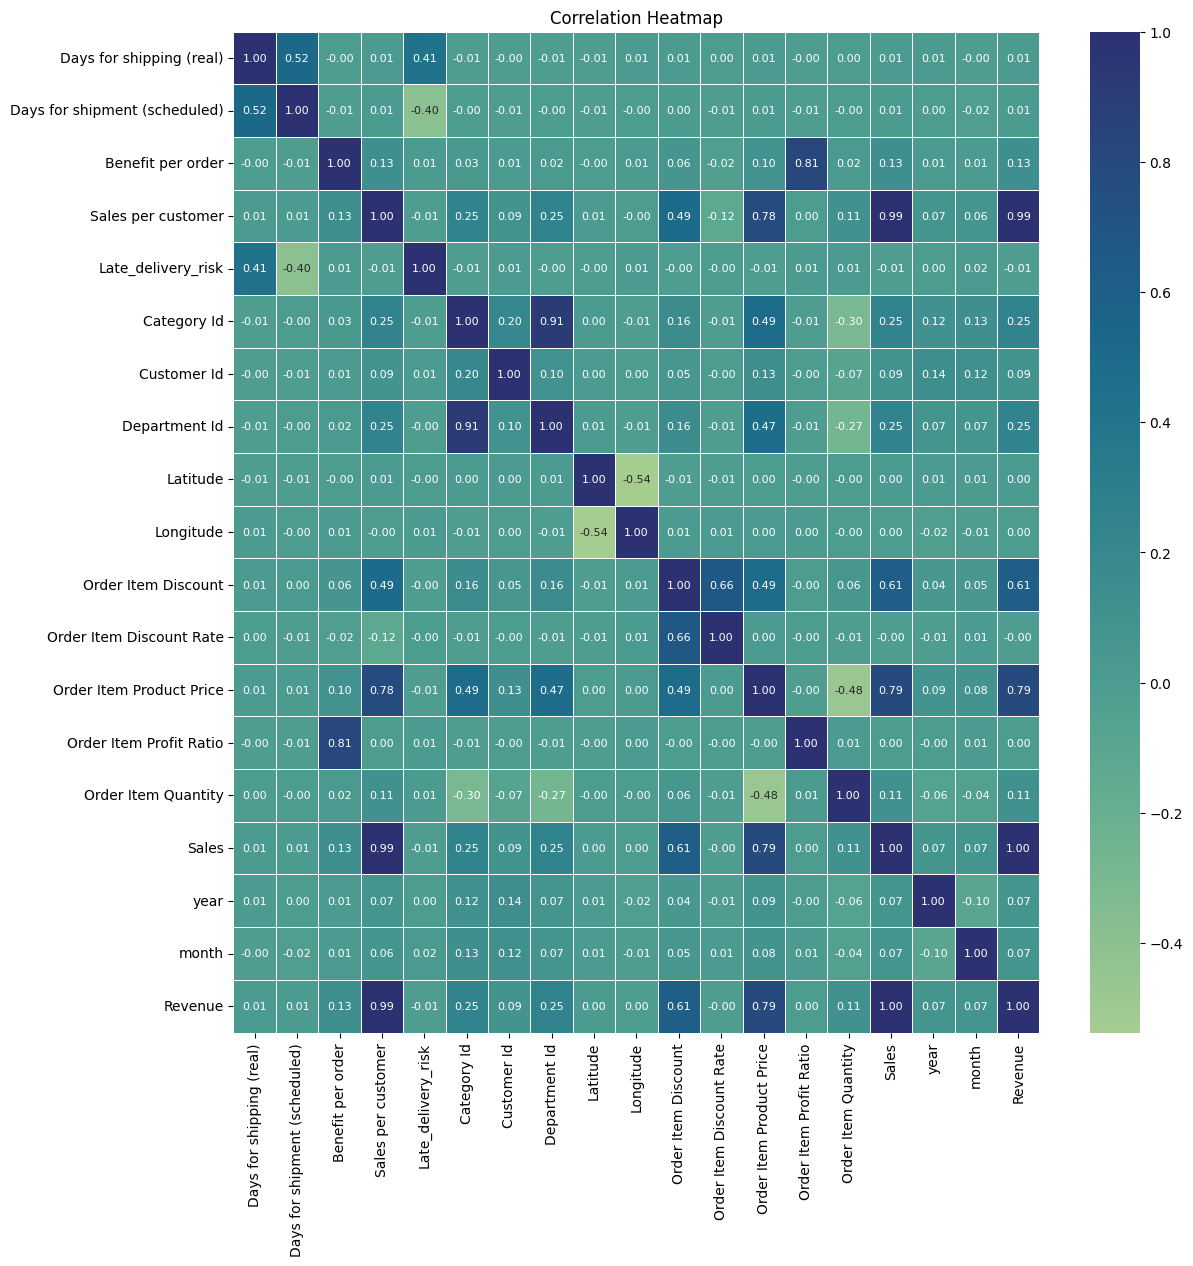

In [17]:
# Numeric_only=True, as .corr() can only take float or int 
correlation_matrix = df1.corr(numeric_only=True)
plt.figure(figsize=(13, 13))  
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f', linewidths=0.5,annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()

#### Some Insights from Heatmap:
* Order Item Product Price and Order Item Profit Ratio (0.79): <br/> Suggests that higher-priced items tend to have a higher profit ratio.
* Order Item Profit Ratio and Sales (0.62): <br/> Indicates that higher sales are moderately linked to better profitability.
* Benefit per order and Order Item Profit Ratio (0.82): <br/> Shows that more profitable orders yield higher benefits.
* Order Item Quantity and Sales (-0.08): <br/> This weak negative correlation suggests that higher sales do not necessarily come from larger quantities of items, potentially due to high-priced, low-quantity products.
* Year/Month with Business Metrics (~0.01 to 0.14): <br/> Little correlation between time-related variables (year, month) and most variables, suggests sales and discounts are not heavily influenced by time trends in this dataset.


##### Delivery insights
* Days for Shipping (real) & Days for Shipping (scheduled) (0.52): <br/>
Moderate positive correlation, scheduled shipping times moderately predict actual shipping times, but delays do occur.
* Late Delivery Risk & Days for Shipping (real) (-0.41): <br/>
Late delivery risk decreases as actual shipping days increase, suggests longer shipping durations may reduce the risk of late deliveries.
* Late_delivery_risk and Days for shipment (scheduled) (-0.37): <br/>
Suggests that better scheduling reduces the risk of late delivery.

#### Analysing Revenue Trends

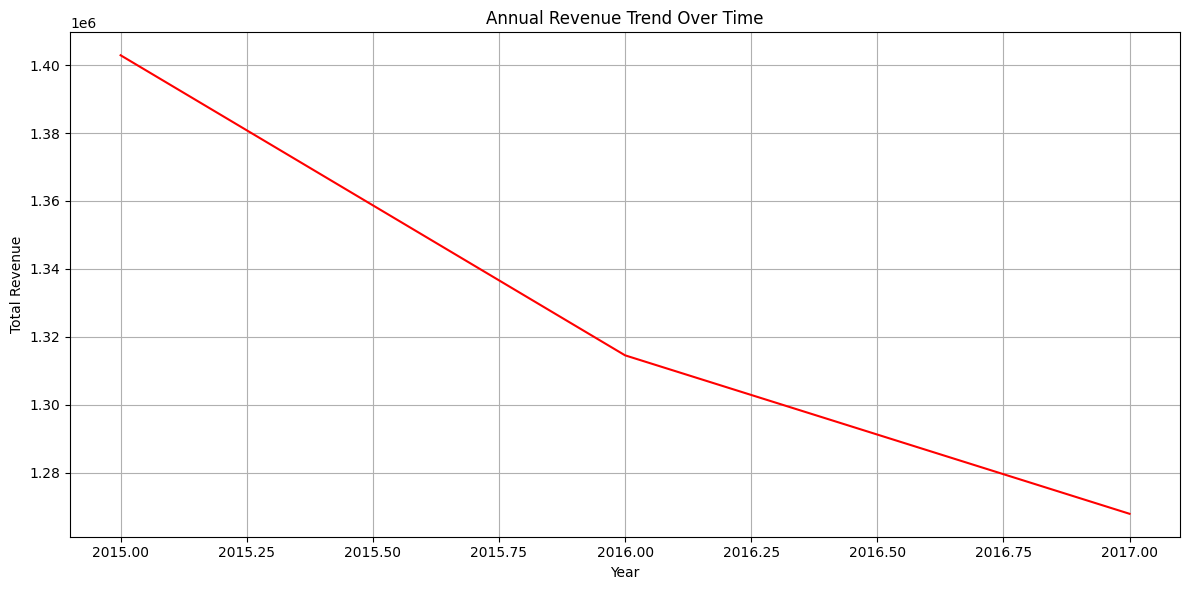

In [18]:
# Plotting the revenue trend over years
annual_revenue.plot(kind='line', figsize=(12, 6), color='red')
plt.title('Annual Revenue Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

Anlaysing sales trend by customer segments to identify which segment might be contributing to the decreasing revenue

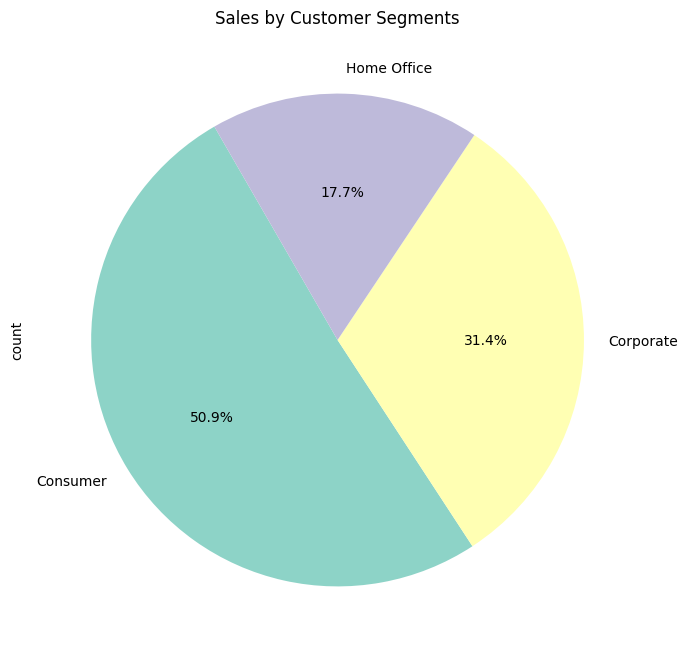

In [19]:
df1['Customer Segment'].value_counts().sort_index().plot(kind='pie', title='Sales by Customer Segments', autopct='%1.1f%%', startangle=120, figsize=(8, 8), colors = sns.color_palette("Set3"))
plt.rcParams['figure.figsize'] = (14, 6)
plt.show()

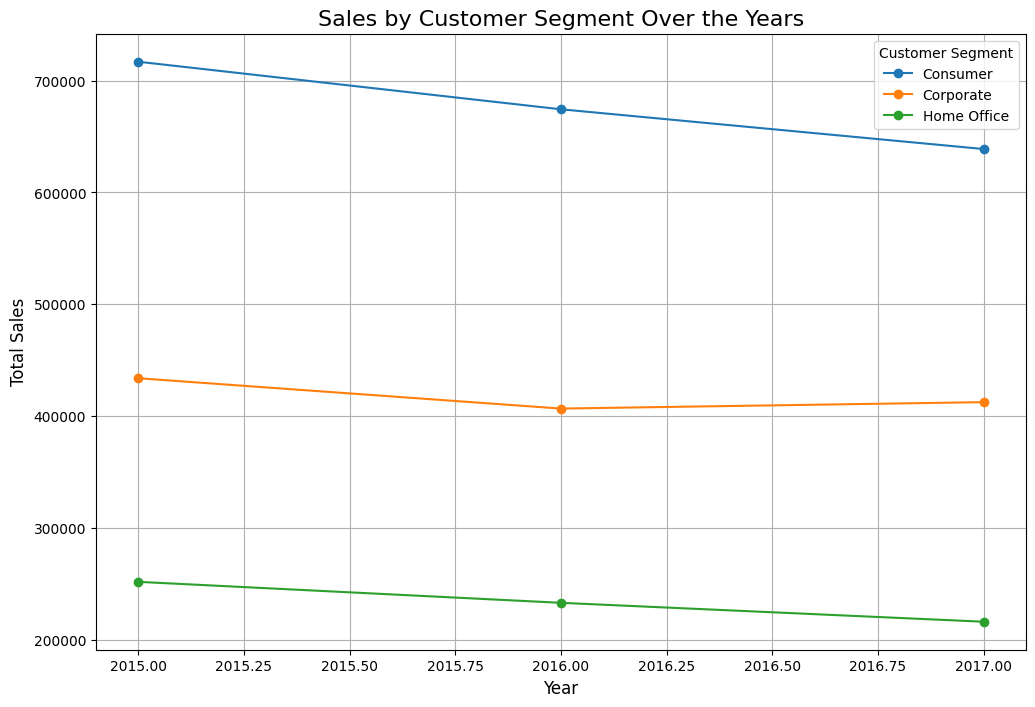

In [20]:
# Group data by customer segment and year
customer_segment = df1.groupby(['Customer Segment', 'year'])['Sales'].sum().reset_index()

# Pivot the data for easier plotting
pivot_customer_segment = customer_segment.pivot(index='year', columns='Customer Segment', values='Sales')

# Plot the data
plt.figure(figsize=(12, 8))

for segment in pivot_customer_segment.columns:
    plt.plot(pivot_customer_segment.index, pivot_customer_segment[segment], label=segment, marker='o')

plt.title('Sales by Customer Segment Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Customer Segment')
plt.grid(True)
plt.show()


From the above, Consumer Segment is the largest contributor to the revenue. <br/>
We will perform further analysis with the focus on Consumer Segment to investigate what may result in the significant decrease in sales.

In [21]:
# Filtering data further to only focus on 'Consumer' in 'Customer Segment'

df1_consumer = df1[df1['Customer Segment'].isin(['Consumer'])]
df1_consumer

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Name,shipping date (DateOrders),Shipping Mode,order_date,year,month,Revenue
1174,CASH,2,1,78.660004,262.200012,Late delivery,1,73,Sporting Goods,Caguas,...,Southeast Asia,Yakarta,CLOSED,Smart watch,12/6/2017 14:37,First Class,2017-12-04 14:37:00,2017,12,327.750000
1177,CASH,3,4,109.669998,324.470001,Advance shipping,0,73,Sporting Goods,Tampa,...,Southeast Asia,Yakarta,CLOSED,Smart watch,12/7/2017 13:34,Standard Class,2017-12-04 13:34:00,2017,12,327.750000
1188,CASH,2,2,136.509995,278.589996,Shipping on time,0,73,Sporting Goods,Irvington,...,Southeast Asia,Rangún,CLOSED,Smart watch,12/6/2017 9:43,Second Class,2017-12-04 09:43:00,2017,12,327.750000
1191,CASH,2,1,23.650000,268.760010,Late delivery,1,73,Sporting Goods,Gardena,...,Southeast Asia,Rangún,CLOSED,Smart watch,12/6/2017 8:39,First Class,2017-12-04 08:39:00,2017,12,327.750000
1213,CASH,2,4,158.990005,324.470001,Advance shipping,0,73,Sporting Goods,Caguas,...,Southeast Asia,Capital Nacional,CLOSED,Smart watch,12/6/2017 0:57,Standard Class,2017-12-04 00:57:00,2017,12,327.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180451,CASH,3,2,36.000000,359.980011,Late delivery,1,45,Fishing,Germantown,...,Eastern Asia,Gansu,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,1/22/2016 17:09,Second Class,2016-01-19 17:09:00,2016,1,399.980011
180452,CASH,3,2,-237.589996,351.980011,Late delivery,1,45,Fishing,Germantown,...,Eastern Asia,Gansu,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,1/22/2016 17:09,Second Class,2016-01-19 17:09:00,2016,1,399.980011
180467,CASH,2,1,27.900000,371.980011,Late delivery,1,45,Fishing,Panorama City,...,South Asia,Maharashtra,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 19:05,First Class,2016-01-18 19:05:00,2016,1,399.980011
180496,CASH,2,4,145.190002,399.980011,Advance shipping,0,45,Fishing,Costa Mesa,...,Eastern Asia,Shanghái,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,1/18/2016 22:14,Standard Class,2016-01-16 22:14:00,2016,1,399.980011


#### Analysis by Department

In [22]:
# Grouping by Department to calculate average profits and total sales
df1_consumer["Department Profit"] = df1_consumer['Order Item Profit Ratio'] * df1_consumer['Sales']

department_stats = df1_consumer.groupby('Department Name').agg(
    avg_profit_dept=('Department Profit', 'mean'),
    total_sales=('Sales', 'sum')
).sort_values(by='avg_profit_dept', ascending=False)

print(department_stats)

                    avg_profit_dept    total_sales
Department Name                                   
Technology               116.070297   57383.200377
Footwear                  39.167776  234262.819912
Fan Shop                  32.664590  936134.261768
Fitness                   26.229743   16874.250183
Apparel                   24.211833  451516.544802
Discs Shop                22.674484    9125.270131
Golf                      16.722893  247562.761160
Outdoors                  13.398098   70469.470438
Book Shop                  4.673511     839.159998
Pet Shop                   0.347530    1434.800026
Health and Beauty        -85.763039    4395.600127


C:\Users\lijaa\AppData\Local\Temp\ipykernel_26376\978010826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_consumer["Department Profit"] = df1_consumer['Order Item Profit Ratio'] * df1_consumer['Sales']


C:\Users\lijaa\AppData\Local\Temp\ipykernel_26376\1658243904.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


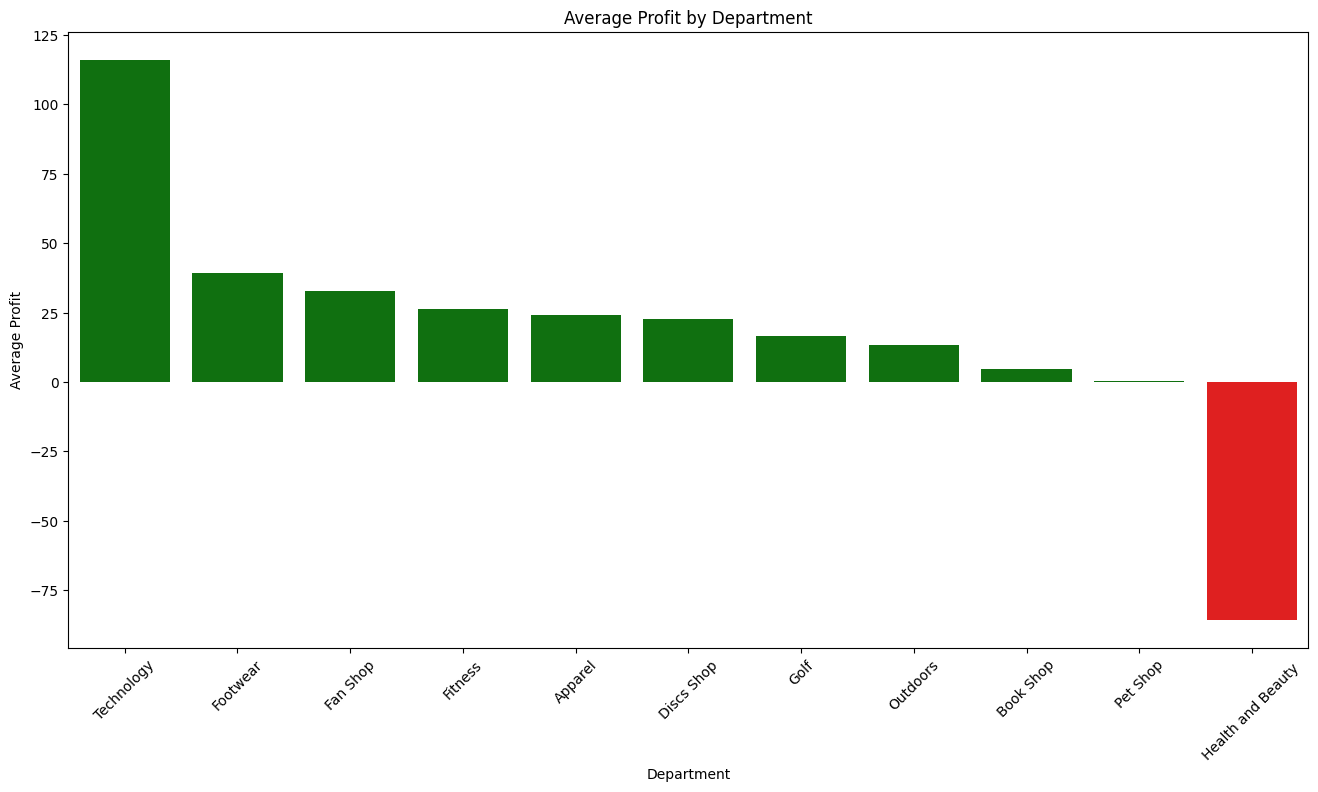

In [23]:
colors = ['green' if val > 0 else 'red' for val in department_stats['avg_profit_dept']]

# Plot the bar chart
plt.figure(figsize=(16, 8))
sns.barplot(
    x=department_stats.index, 
    y=department_stats['avg_profit_dept'], 
    palette=colors)

plt.title('Average Profit by Department')
plt.xticks(rotation=45)
plt.ylabel('Average Profit')
plt.xlabel('Department')
plt.show()

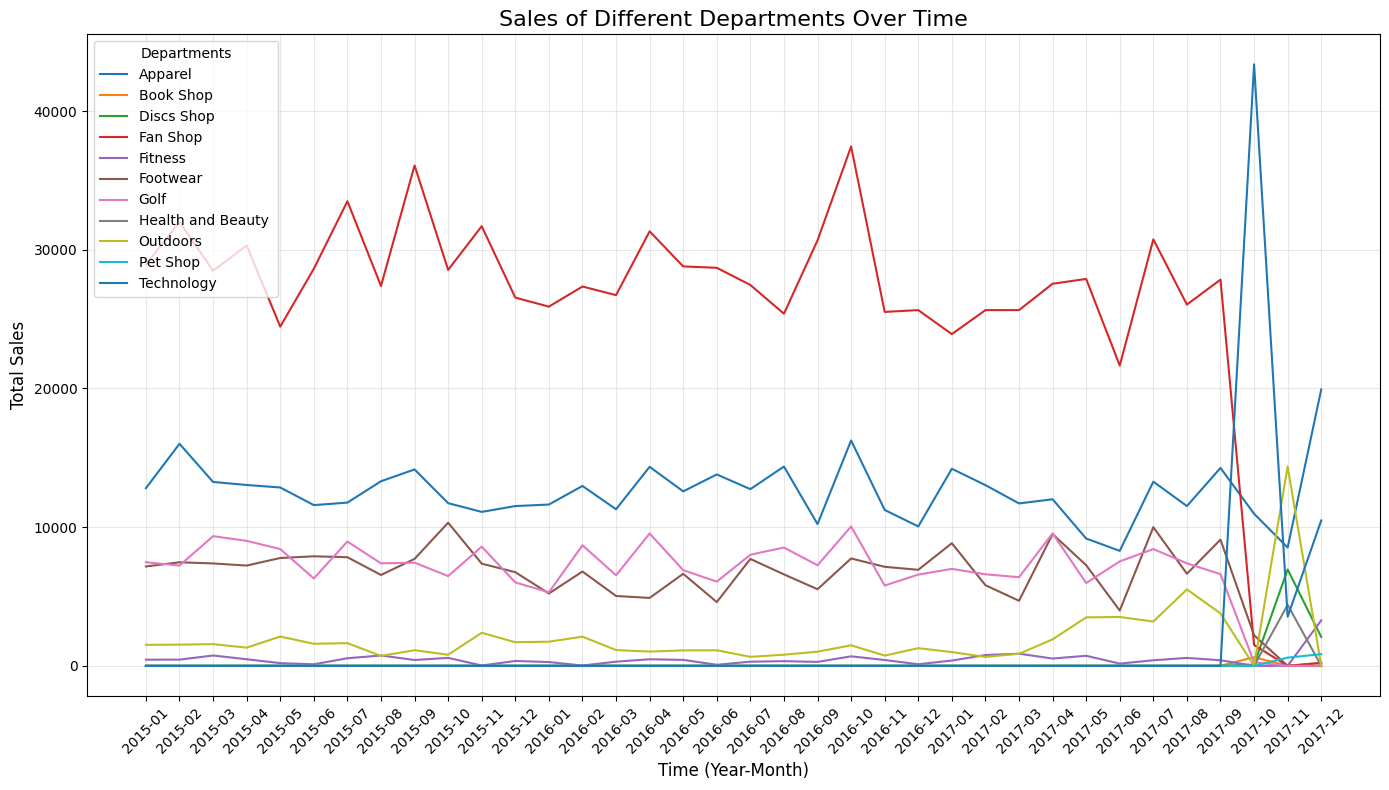

In [28]:
# Ensure order_date is in datetime format
df1_consumer['order_date'] = pd.to_datetime(df1_consumer['order_date'])

# Drop rows with missing values in key columns
df1_consumer = df1_consumer.dropna(subset=['order_date', 'Sales', 'Department Name'])

# Extract YearMonth for grouping
df1_consumer['YearMonth'] = df1_consumer['order_date'].dt.to_period('M')

# Group sales data by Department and YearMonth
dept_sales_over_time = df1_consumer.groupby(['Department Name', 'YearMonth'])['Sales'].sum().reset_index()

# Convert 'YearMonth' to string for plotting
dept_sales_over_time['YearMonth'] = dept_sales_over_time['YearMonth'].astype(str)

# Pivot the data to have departments as columns
dept_sales_pivot = dept_sales_over_time.pivot(index='YearMonth', columns='Department Name', values='Sales').fillna(0)

# Sort the index to ensure proper plotting order
dept_sales_pivot = dept_sales_pivot.sort_index()

# Plotting the sales trends
plt.figure(figsize=(14, 8))
for department in dept_sales_pivot.columns:
    plt.plot(dept_sales_pivot.index, dept_sales_pivot[department], label=department)

# Formatting the plot
plt.title('Sales of Different Departments Over Time', fontsize=16)
plt.xlabel('Time (Year-Month)', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(loc='upper left', title='Departments', fontsize=10)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


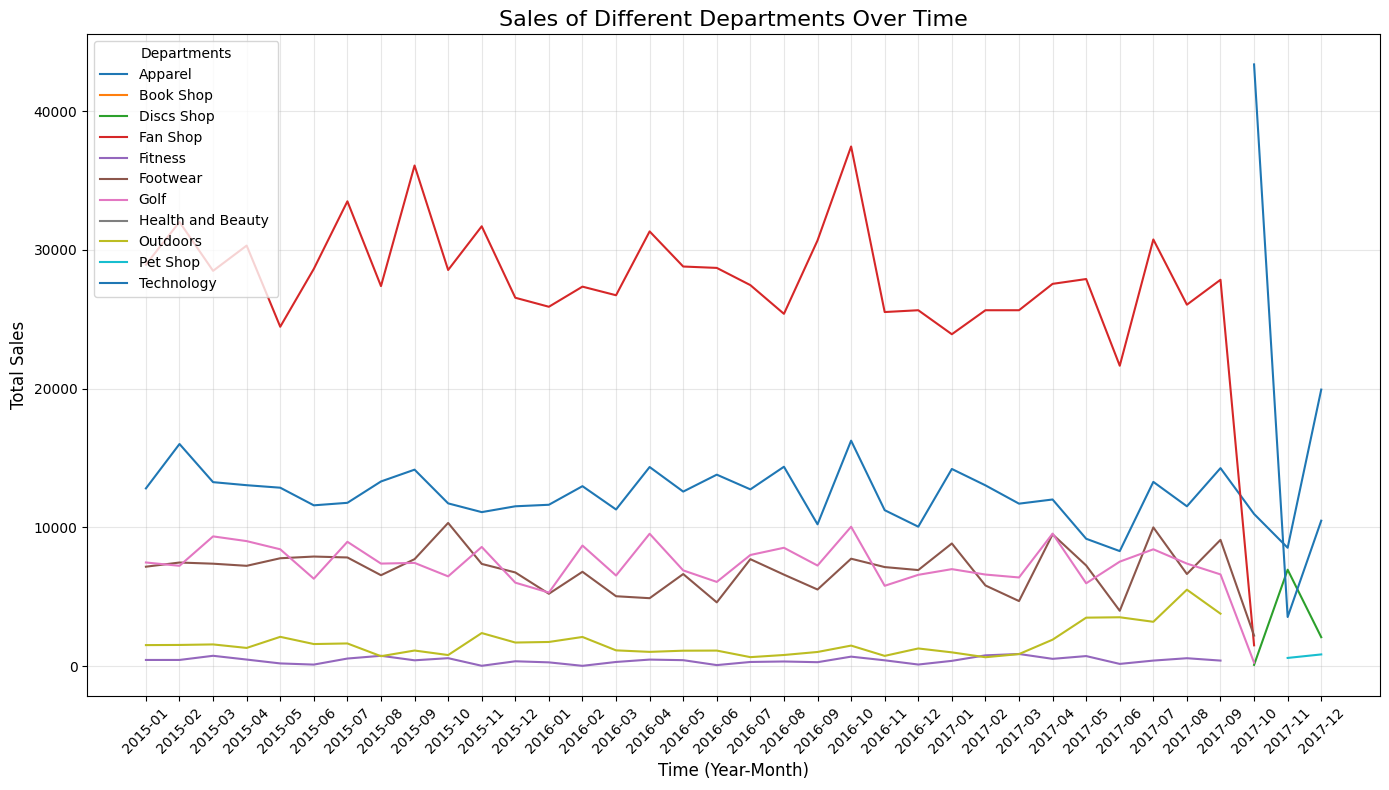

In [29]:
# Extract year and month for grouping
df1_consumer['YearMonth'] = df1_consumer['order_date'].dt.to_period('M')  # Combines year and month into YYYY-MM format

# Group sales data by Department and YearMonth
dept_sales_over_time = df1_consumer.groupby(['Department Name', 'YearMonth'])['Sales'].sum().reset_index()

# Convert 'YearMonth' from Period to string for plotting
dept_sales_over_time['YearMonth'] = dept_sales_over_time['YearMonth'].astype(str)

# Pivot the data to have departments as columns
dept_sales_pivot = dept_sales_over_time.pivot(index='YearMonth', columns='Department Name', values='Sales')

# Plotting the sales trends
plt.figure(figsize=(14, 8))
for department in dept_sales_pivot.columns:
    plt.plot(dept_sales_pivot.index, dept_sales_pivot[department], label=department)

# Formatting the plot
plt.title('Sales of Different Departments Over Time', fontsize=16)
plt.xlabel('Time (Year-Month)', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(loc='upper left', title='Departments', fontsize=10)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

The data seems to be abnormal starting from '2017-09', where technology department started to have sales value. <br/>
Inconclusive but speculations we have includes:
* possibility of other sales data being recorded wrongly into Technology department
* possibility where Techonology product was the new hot thing that garnered huge sales from consumer for a short period of time

However, this causes uncertainty in our analysis, to ensure reliability, we will drop data from '2017-09'

In [30]:
# Filter out data from 2017-09 onwards
df2 = df1_consumer[df1_consumer['YearMonth'] < '2017-09-01']

# Check the filtered dataset
df2


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Status,Product Name,shipping date (DateOrders),Shipping Mode,order_date,year,month,Revenue,Department Profit,YearMonth
2586,CASH,4,2,20.280001,42.240002,Late delivery,1,7,Hockey,Caguas,...,CLOSED,Nike Dri-FIT Crew Sock 6 Pack,2/24/2017 14:08,Second Class,2017-02-20 14:08:00,2017,2,44.000000,21.120000,2017-02
2588,CASH,2,1,-16.719999,41.799999,Late delivery,1,7,Hockey,Caguas,...,CLOSED,Nike Dri-FIT Crew Sock 6 Pack,2/18/2017 23:57,First Class,2017-02-16 23:57:00,2017,2,44.000000,-17.600000,2017-02
2593,CASH,4,4,51.740002,105.599998,Shipping on time,0,7,Hockey,Caguas,...,CLOSED,Nike Dri-FIT Crew Sock 6 Pack,2/13/2017 8:22,Standard Class,2017-02-09 08:22:00,2017,2,110.000000,53.900001,2017-02
2636,CASH,3,4,14.720000,43.560001,Advance shipping,0,7,Hockey,Caguas,...,CLOSED,Nike Dri-FIT Crew Sock 6 Pack,10/15/2016 13:27,Standard Class,2016-10-12 13:27:00,2016,10,44.000000,14.960000,2016-10
2646,CASH,6,4,12.940000,43.119999,Late delivery,1,7,Hockey,Chicago,...,CLOSED,Nike Dri-FIT Crew Sock 6 Pack,9/14/2016 3:41,Standard Class,2016-09-08 03:41:00,2016,9,44.000000,13.200001,2016-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180451,CASH,3,2,36.000000,359.980011,Late delivery,1,45,Fishing,Germantown,...,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,1/22/2016 17:09,Second Class,2016-01-19 17:09:00,2016,1,399.980011,39.998001,2016-01
180452,CASH,3,2,-237.589996,351.980011,Late delivery,1,45,Fishing,Germantown,...,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,1/22/2016 17:09,Second Class,2016-01-19 17:09:00,2016,1,399.980011,-271.986410,2016-01
180467,CASH,2,1,27.900000,371.980011,Late delivery,1,45,Fishing,Panorama City,...,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 19:05,First Class,2016-01-18 19:05:00,2016,1,399.980011,31.998400,2016-01
180496,CASH,2,4,145.190002,399.980011,Advance shipping,0,45,Fishing,Costa Mesa,...,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,1/18/2016 22:14,Standard Class,2016-01-16 22:14:00,2016,1,399.980011,143.992810,2016-01


Running the same trend analysis with the cleaned data

C:\Users\lijaa\AppData\Local\Temp\ipykernel_26376\2686242288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['YearMonth'] = df2['order_date'].dt.to_period('M')  # Combines year and month into YYYY-MM format


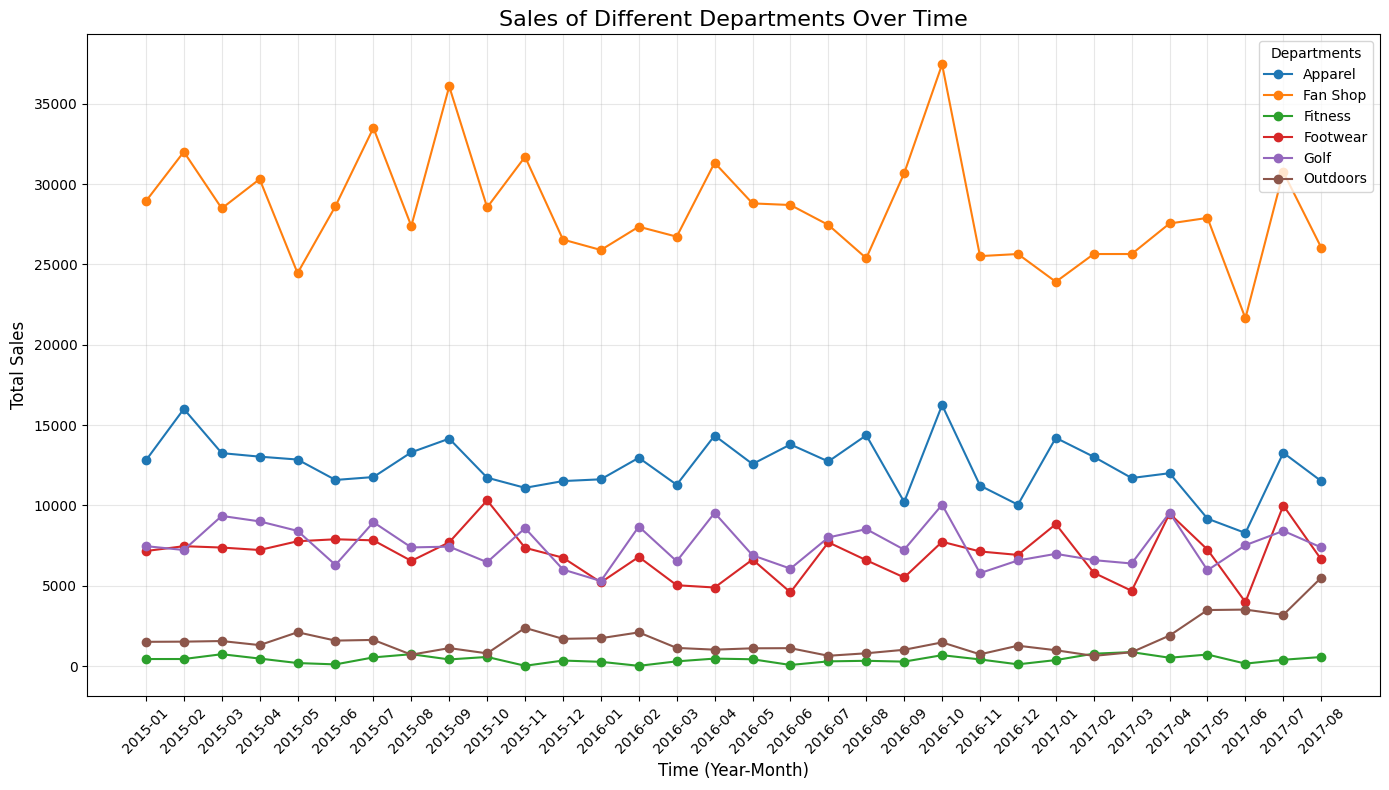

In [31]:
# Extract year and month for grouping
df2['YearMonth'] = df2['order_date'].dt.to_period('M')  # Combines year and month into YYYY-MM format

# Group sales data by Department and YearMonth
dept_sales_over_time = df2.groupby(['Department Name', 'YearMonth'])['Sales'].sum().reset_index()

# Convert 'YearMonth' from Period to string for plotting
dept_sales_over_time['YearMonth'] = dept_sales_over_time['YearMonth'].astype(str)

# Plotting the sales trends
plt.figure(figsize=(14, 8))
# Loop through unique departments to plot individual lines
for department in dept_sales_over_time['Department Name'].unique():
    department_data = dept_sales_over_time[
        dept_sales_over_time['Department Name'] == department
    ]
    plt.plot(
        department_data['YearMonth'],
        department_data['Sales'],
        marker='o',
        label=department,
    )

# Formatting the plot
plt.title('Sales of Different Departments Over Time', fontsize=16)
plt.xlabel('Time (Year-Month)', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(loc='upper right', title='Departments', fontsize=10)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

Fan Shop Department shows the greatest contribution to sales <br/>
Outdoors and Fitness are the lowest contributors to sales <br/>

This could be due to Consumer demographics or management inefficiency by the respective department. Current data is inconclusive, require further analysis.

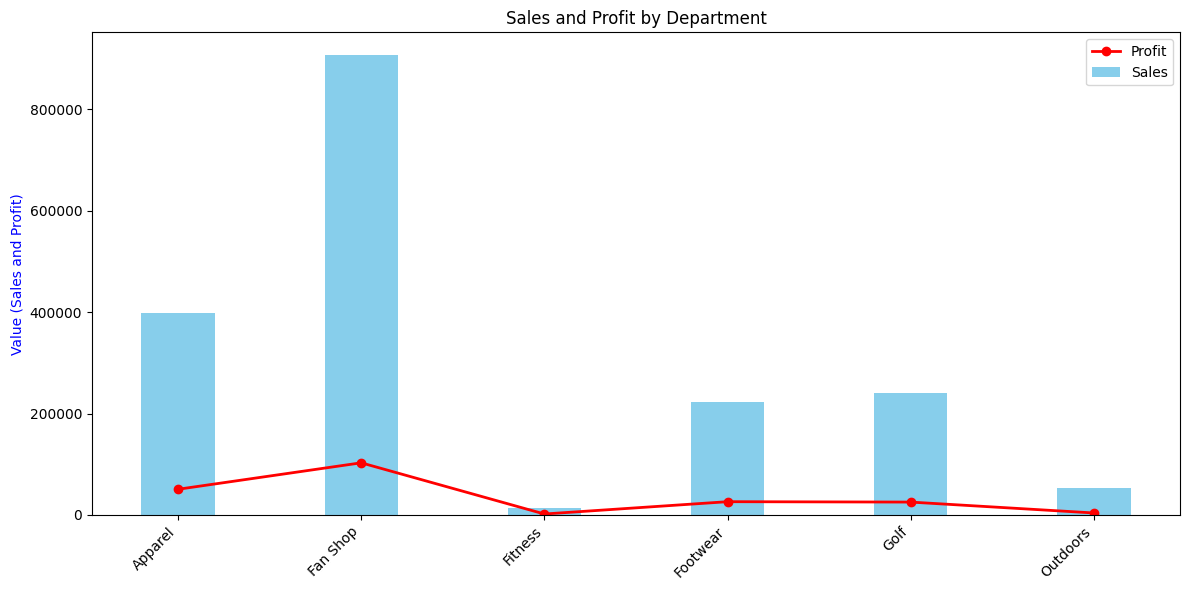

In [95]:
# Group data by department and calculate total sales and profit
department_data = df2.groupby('Department Name').agg({'Sales': 'sum', 'Benefit per order': 'sum'}).reset_index()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Bar chart for sales
bar_width = 0.4
bar_positions = np.arange(len(department_data['Department Name']))

bars = ax.bar(bar_positions, department_data['Sales'], width=bar_width, label='Sales', color='skyblue')

# Line chart for profit
ax.plot(bar_positions, department_data['Benefit per order'], label='Profit', color='red', marker='o', linewidth=2)

# Set axis labels and title

ax.set_ylabel('Value (Sales and Profit)', color='blue')
ax.set_title('Sales and Profit by Department')
ax.set_xticks(bar_positions)
ax.set_xticklabels(department_data['Department Name'], rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

This provides insights to how the profit margins are low considering high sales amount. This could suggest improvements required in reducing costs to raise profits.

#### Analysis by Category

In [96]:
# Calculate profit for each row
df2['Category Profit'] = df2['Order Item Profit Ratio'] * df2['Sales']

# Grouping by Category to calculate average profits and total sales
category_stats = df2.groupby('Category Name').agg(
    avg_profit_cat=('Category Profit', 'mean'),
    total_sales=('Sales', 'sum')
).sort_values(by='avg_profit_cat', ascending=False)

print(category_stats)


                      avg_profit_cat    total_sales
Category Name                                      
Fishing                    52.693204  374781.270307
Golf Bags & Carts          47.597202     169.990005
Boxing & MMA               45.907669    4138.880058
Strength Training          42.997501     756.000000
Cardio Equipment           40.721045  210109.079894
Women's Golf Clubs         38.819363    3599.649979
Camping & Hiking           38.450828  212385.847788
Cleats                     26.300594  240799.866781
Baseball & Softball        24.374116    5943.880150
Tennis & Racquet           23.844700    2204.510040
Indoor/Outdoor Games       22.217898  153638.518518
Electronics                18.263886   20325.720181
Men's Footwear             17.817670  157027.926644
Water Sports               17.604995  163391.834494
Women's Apparel            17.521520  165500.000000
Girls' Apparel             16.216893    7139.650032
Lacrosse                   14.702929    1799.489998
Shop By Spor

C:\Users\kohme\AppData\Local\Temp\ipykernel_27620\231527797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Category Profit'] = df2['Order Item Profit Ratio'] * df2['Sales']


Identifying Product Category that contributes most to profits

C:\Users\kohme\AppData\Local\Temp\ipykernel_27620\2952134432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


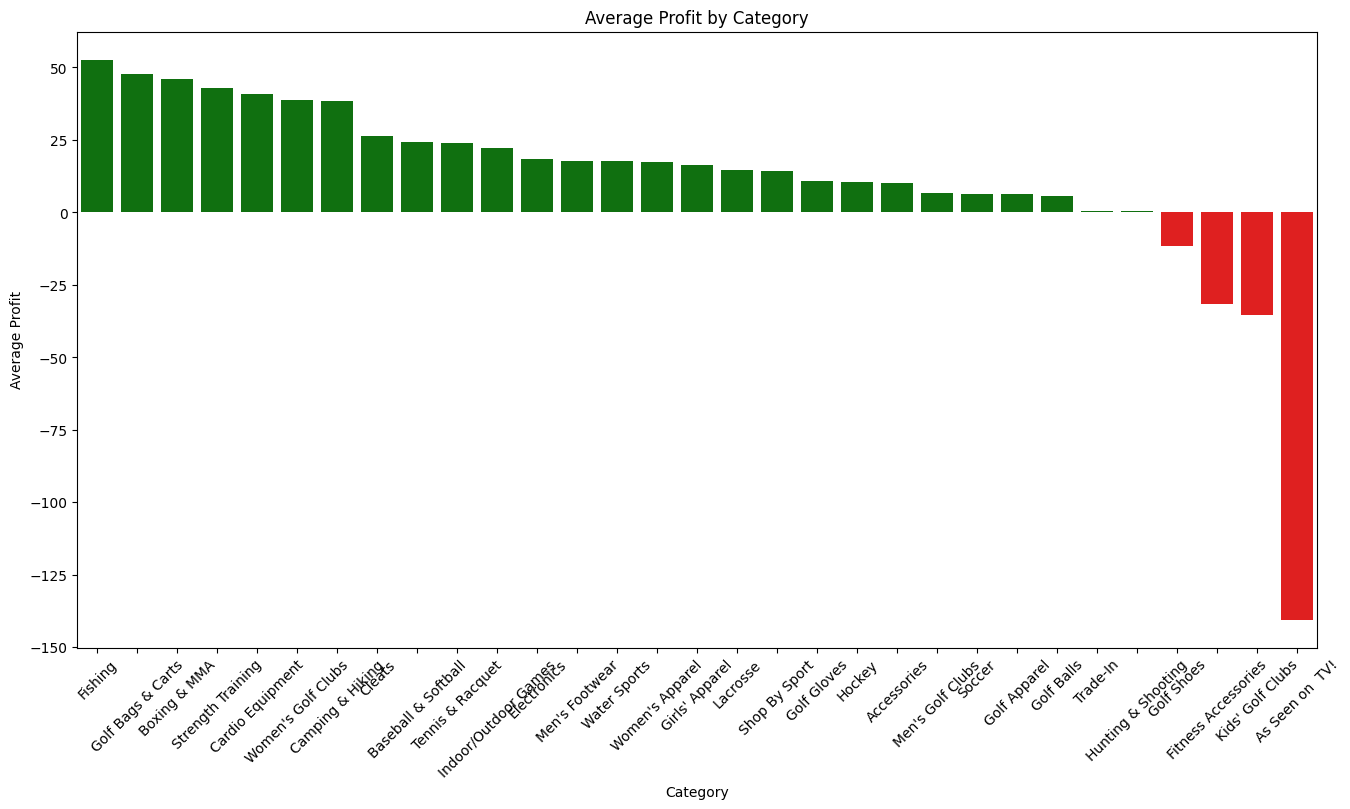

In [97]:
colors = ['green' if val > 0 else 'red' for val in category_stats['avg_profit_cat']]

# Plot the bar chart
plt.figure(figsize=(16, 8))
sns.barplot(
    x=category_stats.index, 
    y=category_stats['avg_profit_cat'], 
    palette=colors)

plt.title('Average Profit by Category')
plt.xticks(rotation=45)
plt.ylabel('Average Profit')
plt.xlabel('Category')
plt.show()

#### Delivery Data Analysis

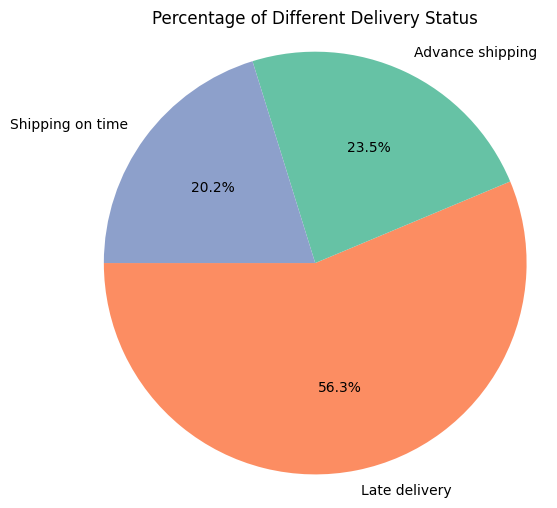

In [98]:
status_counts = df2['Delivery Status'].value_counts()

# To assign Late delivery as the seaborn palette red
color = sns.color_palette("Set2")
palette = sns.color_palette([color[1], color[0], color[2]])

plt.figure(figsize=(6, 6))
plt.pie(status_counts, 
        labels=status_counts.index, 
        autopct='%1.1f%%', 
        startangle=180, 
        colors=palette)
plt.title("Percentage of Different Delivery Status")
plt.axis('equal')
plt.show()

Investigating relationship between different Shipping Modes with Delivery Status 

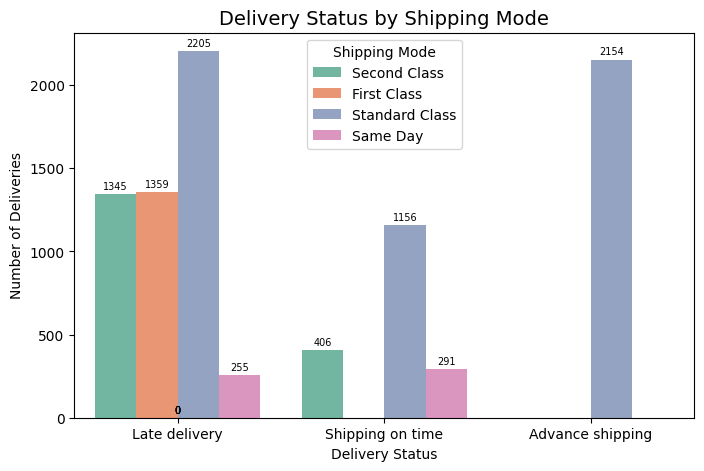

In [99]:
plt.figure(figsize=(8, 5))
barplot = sns.countplot(x='Delivery Status', hue='Shipping Mode', data=df2, palette='Set2')

plt.title('Delivery Status by Shipping Mode', fontsize=14)
plt.xlabel('Delivery Status')
plt.ylabel('Number of Deliveries')

# Total delivery count on top of each bar
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}',  
                     (p.get_x() + p.get_width()/2., p.get_height()),  
                     ha = 'center', va = 'bottom',  
                     fontsize = 7, color = 'black',  
                     xytext = (0, 2), 
                     textcoords = 'offset points')

plt.show()

#### Insights from analysis
* First Class shipping is unreliable, always result in Late Delivery

Potential contribution in reduced sales due to unreliable delivery with over 50% of orders delivered late. 